In [1]:
!pip install fastai==2.7.9
!pip install fastkaggle==0.0.7
!pip install fasterai==0.1.11
!pip install ipython-autotime==0.3.1
!pip install torch==1.12.1
%load_ext autotime

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.5/225.5 kB 11.7 MB/s eta 0:00:00
  Attempting uninstall: fastai
    Found existing installation: fastai 2.7.11
    Uninstalling fastai-2.7.11:
      Successfully uninstalled fastai-2.7.11
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 774.0 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: torch
    Found existing installation: torch 1.12.0
    Uninstalling torch-1.12.0:
      Successfully uninstalled torch-1.12.0
/bin/bash: /opt/conda/lib/libtin

In [2]:
from fastai.vision.all import *
from fastai.callback.all import *
from fastai.data.all import *
from fastai.imports import *
from fastai.torch_core import *
from fastai.learner import *
from fastai.fp16_utils import *

from fasterai.sparse.all import *
from fasterai.core.criteria import *
from fasterai.regularize.all import *

from fastkaggle import *

import torch
import torch.nn as nn
import torch.nn.functional as F


set_seed(42)

/opt/conda/lib/python3.7/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /opt/conda/lib/python3.7/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE
  warn(f"Failed to load image Python extension: {e}")


time: 4.27 s (started: 2023-05-01 07:55:45 +00:00)


In [3]:
@patch
def custom_plot_losses(self: Recorder, skip_start=5, with_valid=True, filename="temp.txt"):
    fig2 = plt.figure("Figure 2")

    idx = (np.array(self.iters)<skip_start).sum()
    train_col = self.metric_names.index('train_loss') - 1 
    plt.plot(self.iters[idx:], L(self.values[idx:]).itemgot(train_col), label='train loss')
    plt.legend()
    if with_valid:
        idx = (np.array(self.iters)<skip_start).sum()
        valid_col = self.metric_names.index('valid_loss') - 1 
        plt.plot(self.iters[idx:], L(self.values[idx:]).itemgot(valid_col), label='valid loss')
        plt.legend()

    
@patch
def custom_plot_values(self: Recorder, skip_start=5, with_valid=True):
    fig3 = plt.figure("Figure 3")
    
    idx = (np.array(self.iters)<skip_start).sum()
    train_col = self.metric_names.index('train_accuracy') - 1 
    plt.plot(self.iters[idx:], L(self.values[idx:]).itemgot(train_col), label='train accuracy')

    plt.legend()
    if with_valid:
        idx = (np.array(self.iters)<skip_start).sum()
        valid_col = self.metric_names.index('valid_accuracy') - 1 
        plt.plot(self.iters[idx:], L(self.values[idx:]).itemgot(valid_col), label='valid accuracy')
        plt.legend()

time: 2.54 ms (started: 2023-05-01 07:55:50 +00:00)


In [4]:
comp = 'paddy-diseases/paddy-diseases'

path = setup_comp(comp, install='"fastcore>=1.4.5" "fastai>=2.7.1" "timm>=0.6.2.dev0"')

time: 17.4 s (started: 2023-05-01 07:55:50 +00:00)


In [5]:
dls = ImageDataLoaders.from_folder(path/"train", 
                                   valid_pct=0.25, 
                                   item_tfms=Resize(256), 
                                   batch_tfms=aug_transforms(   size=64, 
                                                                min_scale=0.75,
                                                                max_rotate=10., 
                                                                min_zoom=0.8, 
                                                                max_zoom=1.2, 
                                                            
                                                            ), 
                                   bs=32//2)

time: 6.37 s (started: 2023-05-01 07:56:07 +00:00)


In [6]:
sp_cb=[
      GradientAccumulation(32), 
      SparsifyCallback(sparsity=25, 
                         granularity='filter', 
                         context='local', 
                         criteria=large_final, 
                         schedule=one_cycle),


]

time: 976 µs (started: 2023-05-01 07:56:13 +00:00)


In [7]:
model = vgg16_bn(num_classes=10)


time: 3.23 s (started: 2023-05-01 07:56:13 +00:00)


In [8]:
learn = Learner(dls, 
                model, 
                metrics=[accuracy,
                         error_rate,
                        ]).to_fp16()
learn.unfreeze()
learn.recorder.train_metrics = True
learn.path = Path("/kaggle/working/")

time: 22.8 ms (started: 2023-05-01 07:56:17 +00:00)


Pruning of filter until a sparsity of [25]%
Saving Weights at epoch 0


epoch,train_loss,train_accuracy,train_error_rate,valid_loss,valid_accuracy,valid_error_rate,time
0,2.231874,0.174519,0.825481,2.066468,0.276923,0.723077,02:18
1,2.158582,0.218750,0.781250,2.017792,0.292788,0.707212,02:11
2,2.062152,0.240705,0.759295,1.985882,0.298558,0.701442,02:12
3,2.067952,0.260577,0.739423,1.943030,0.330769,0.669231,01:54
4,2.029466,0.276282,0.723718,1.933639,0.320192,0.679808,01:44
5,1.998724,0.285577,0.714423,1.851697,0.365385,0.634615,02:13
6,1.927547,0.307051,0.692949,1.805246,0.369712,0.630288,02:13
7,1.885810,0.321635,0.678365,1.762237,0.401923,0.598077,01:48
8,1.871268,0.341506,0.658494,1.673825,0.423077,0.576923,01:23
9,1.817276,0.375321,0.624680,1.642437,0.443269,0.556731,01:22


Sparsity at the end of epoch 0: [0.07]%
Sparsity at the end of epoch 1: [0.08]%
Sparsity at the end of epoch 2: [0.09]%
Sparsity at the end of epoch 3: [0.11]%
Sparsity at the end of epoch 4: [0.12]%
Sparsity at the end of epoch 5: [0.14]%
Sparsity at the end of epoch 6: [0.16]%
Sparsity at the end of epoch 7: [0.19]%
Sparsity at the end of epoch 8: [0.22]%
Sparsity at the end of epoch 9: [0.25]%
Sparsity at the end of epoch 10: [0.29]%
Sparsity at the end of epoch 11: [0.33]%
Sparsity at the end of epoch 12: [0.38]%
Sparsity at the end of epoch 13: [0.43]%
Sparsity at the end of epoch 14: [0.5]%
Sparsity at the end of epoch 15: [0.57]%
Sparsity at the end of epoch 16: [0.65]%
Sparsity at the end of epoch 17: [0.75]%
Sparsity at the end of epoch 18: [0.86]%
Sparsity at the end of epoch 19: [0.98]%
Sparsity at the end of epoch 20: [1.12]%
Sparsity at the end of epoch 21: [1.28]%
Sparsity at the end of epoch 22: [1.46]%
Sparsity at the end of epoch 23: [1.67]%
Sparsity at the end of epoc

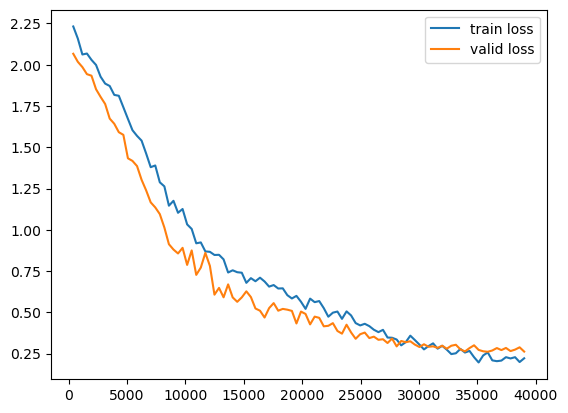

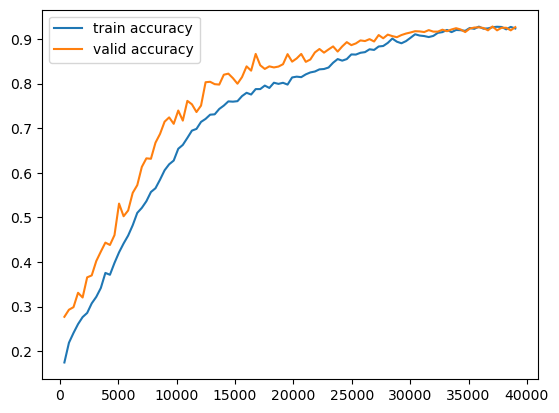

time: 2h 29min 43s (started: 2023-05-01 07:56:17 +00:00)


In [9]:
learn.fit_one_cycle(100, 3e-5, cbs=sp_cb)
                    
learn.recorder.custom_plot_losses()
learn.recorder.custom_plot_values()

In [29]:
learn.export(Path("/kaggle/working/VGG16_bn_native_fp16_accum2_sparse25.pkl"))

time: 3.19 s (started: 2023-05-01 10:35:31 +00:00)


In [20]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters())

time: 1.11 ms (started: 2023-05-01 10:34:04 +00:00)


In [21]:
count_parameters(learn.model)


134309962

time: 6.09 ms (started: 2023-05-01 10:34:04 +00:00)


In [22]:
pruner = Pruner()
pruned_model = pruner.prune_model(learn.model)

time: 87.5 ms (started: 2023-05-01 10:34:04 +00:00)


In [23]:
pruned_learn = Learner(dls, pruned_model.cuda(), metrics=accuracy)


time: 3.06 ms (started: 2023-05-01 10:34:04 +00:00)


In [24]:
pruned_learn.validate()

(#2) [0.26230815052986145,0.9264423251152039]

time: 31.1 s (started: 2023-05-01 10:34:04 +00:00)


In [25]:
count_parameters(pruned_learn)

102181178

time: 6.01 ms (started: 2023-05-01 10:34:35 +00:00)


In [27]:
pruned_learn.export(Path("/kaggle/working/VGG16_bn_native_fp16_accum2_sparse25_pruned.pkl"))

time: 1.62 s (started: 2023-05-01 10:35:19 +00:00)
